In [1]:
import numpy as np
import pandas as pd
from collections import deque
import pymongo
from pymongo import MongoClient
print( 'Mongo version', pymongo.__version__)

Mongo version 3.7.0


In [2]:
import networkx as nx
import csv

In [3]:
#main db
config = {
  'host': '127.0.0.1',
  'username': 'mongo_user',
  'password': 'password',
  'authSource': 'pin'
}

client = MongoClient(**config)

db = client.pin
collection1=db.users
collection2=db.sampled_users
collection3=db.more_sampled

In [5]:
collection3.find().count()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


1000

In [6]:
data = pd.DataFrame(list(collection3.find()))

In [7]:
data.head(2)

,_id,follower_count,followers,user_id
0,5b985e62ab17aa0737731b17,0\n,[],48768768
1,5b984589ab17aa073733d635,58,"[1185336, 1593642, 2200705, 3102361, 3125119, ...",18528687


In [8]:
data.drop(columns={'_id','follower_count'},inplace=True)

In [9]:
data.head()

,followers,user_id
0,[],48768768
1,"[1185336, 1593642, 2200705, 3102361, 3125119, ...",18528687
2,[],22783310
3,"[7057505, 25417535, 7447007, 426759\n]",29485812
4,[22750236\n],28704909


In [10]:
count=1000
datalist=[]
for index,row in data.iterrows():
    nodes = [row['user_id']]
    followers=row['followers']
    if len(followers)!=0:
        last=followers.pop()
        followers.append(last.strip('\n'))
    nodes.extend(followers)
    datalist.append(nodes)
    count-=1
    if count == 0:
        break


In [11]:
len(datalist)

1000

In [12]:
data.to_csv('sample2.txt',encoding='utf-8', index=False) #

In [25]:
num_rows = 1000
with open('newfun3.txt','w') as f:
    writer=csv.writer(f,delimiter=' ')
    writer.writerows(datalist[:num_rows])

G=nx.read_adjlist('newfun3.txt')
len(list(nx.connected_components(G))), len(G.edges()) / len(G.nodes())

(790, 0.9844535629659596)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

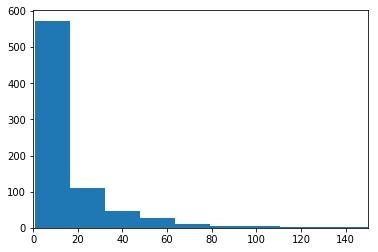

In [27]:
compt_size = [len(compt) for compt in nx.connected_components(G1)]
plt.hist(compt_size, bins = 1400);
plt.xlim(0,150);

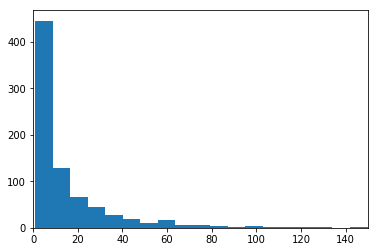

In [57]:
compt_size = [len(compt) for compt in nx.connected_components(G1)]
plt.hist(compt_size, bins = 2800);
plt.xlim(0,150);

(0, 50)

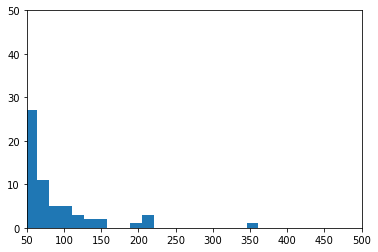

In [56]:
compt_size = [len(compt) for compt in nx.connected_components(G1)]
plt.hist(compt_size, bins = 1400);
plt.xlim(50,500)
plt.ylim(0,50)

In [50]:
large=[x for x in nx.connected_components(G1) if len(x)>200 ]


In [51]:
for component in large:
    print(len(component))

21929
206
206
349
203
205


In [20]:
for i in large:
    if len(i) == 21929:
        component1 = i
    elif len(i) == 349:
        component2 = i
    elif len(i) == 205:
        component3 = i
    else:
        pass

In [52]:
print(len(component1),len(component2),len(component3))

21929 349 205


In [60]:
%matplotlib notebook

In [61]:
G3=G.subgraph(component3)

<IPython.core.display.Javascript object>


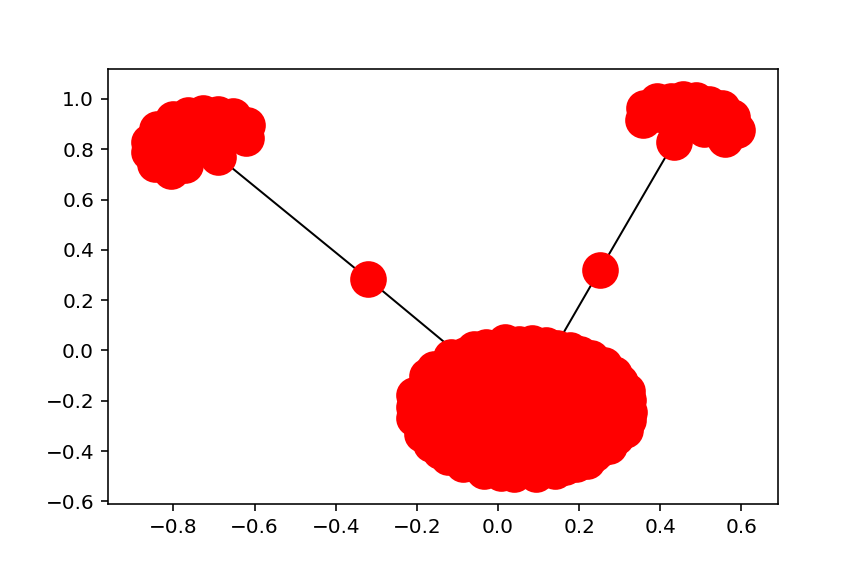

AttributeError: 'bool' object has no attribute 'items'

In [62]:
nx.draw_networkx(G3,labels=False)

In [56]:
G2=G1.subgraph(component2)

In [58]:
nx.draw_networkx(G2,labels=False)

AttributeError: 'bool' object has no attribute 'items'

In [20]:
len(G1.nodes())

29067

In [19]:
len(G1.edges())

28385